## Non-Linear SVM for spam email classifier

### Objective: 
    -To build a Non-linear SVM classifier model to clasify the email as Spam/Ham. 

### 1. Import and Understand data

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
spam_df = pd.read_csv('Spam.csv')
spam_df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
spam_df.shape

(4601, 58)

In [12]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

- As shown there was no missing values in the dataset

In [9]:
# Since it is a classifier problem, finding the imbalance ratio is necessary 
sum(spam_df['spam']/len(spam_df.index))*100

39.40447728754521

    - Spam ratio in the dataset is around 40%

## 2. Data Preperation 

Steps involved in data preperation are :
    - Rescaling the variables
    - Split the data into train-test 
    
Rescaling is required so as to keep all the columns which has higher values (such as capital_run_length_longest, capital_run_length_total, etc ) in par with other columns.

In [13]:
# describe the columns 
spam_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [14]:
# split into X and Y 
X = spam_df.drop('spam', axis=1 )
y = spam_df['spam']

In [15]:
# scaling the features :
from sklearn.preprocessing import scale
X = scale(X)

In [16]:
# split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state=100)

In [17]:
print(y_test.mean())
print(y_train.mean())

0.41274438812454745
0.3860248447204969


## 3. Model Building

In [24]:
# using rbf kernel, C=1, default value of gamma

from sklearn.svm import SVC 
model = SVC( C=1, kernel = 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

- the kernel passed here is `rbf` so the model produces a non-linear seperator between the two classifications

In [21]:
# form a confusion matrix using the predicted data 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_true = y_test, y_pred= y_pred)

array([[774,  37],
       [ 58, 512]])

In [22]:
from sklearn import metrics 
# Print Accuracy of model 
print('accuracy', metrics.accuracy_score(y_test, y_pred))

# Print Precision 
print('precision', metrics.precision_score(y_test, y_pred)) 

# Print Recall 
print('recall', metrics.recall_score(y_test, y_pred))

accuracy 0.9312092686459088
precision 0.9326047358834244
recall 0.8982456140350877


In [23]:
# Print Specificity 
# Specificity = No of Actual No's correctly predicted/Total No of Actual No's 
# Specificity = TN/(TN+FP) 

print('specificity', 774/(774+37))

specificity 0.9543773119605425


## Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

## Grid Search to Find Optimal Hyperparameters

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time). 

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   22.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.177028,0.006663,0.035213,0.000807,1,0.01,"{'C': 1, 'gamma': 0.01}",0.920807,0.927019,0.928571,...,0.928261,0.005503,5,0.939829,0.939829,0.940606,0.939441,0.940217,0.939984,0.000396
1,0.247416,0.003574,0.051489,0.001644,1,0.001,"{'C': 1, 'gamma': 0.001}",0.895963,0.888199,0.906832,...,0.902484,0.009592,10,0.906056,0.904115,0.906056,0.906444,0.903727,0.905280,0.001125
2,0.396074,0.004276,0.084683,0.002026,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.795031,0.753106,0.812112,...,0.788199,0.019310,12,0.795031,0.793866,0.792314,0.795807,0.782997,0.792003,0.004655
3,0.144780,0.003258,0.026567,0.000322,10,0.01,"{'C': 10, 'gamma': 0.01}",0.930124,0.940994,0.937888,...,0.936025,0.003854,1,0.961180,0.962733,0.961568,0.960016,0.958851,0.960870,0.001331
4,0.165738,0.003433,0.031963,0.000800,10,0.001,"{'C': 10, 'gamma': 0.001}",0.917702,0.922360,0.927019,...,0.925466,0.006211,7,0.935947,0.934006,0.935171,0.935559,0.934006,0.934938,0.000799
5,0.249297,0.013913,0.050874,0.000798,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.891304,0.886646,0.900621,...,0.899379,0.009181,11,0.904115,0.897127,0.907609,0.904891,0.897127,0.902174,0.004281
6,0.157286,0.005202,0.022572,0.000524,100,0.01,"{'C': 100, 'gamma': 0.01}",0.934783,0.937888,0.925466,...,0.928571,0.009471,4,0.979814,0.977484,0.980978,0.979037,0.980590,0.979581,0.001242
7,0.148750,0.007972,0.024144,0.000679,100,0.001,"{'C': 100, 'gamma': 0.001}",0.928571,0.931677,0.934783,...,0.935714,0.005521,2,0.950311,0.946817,0.950311,0.947593,0.946429,0.948292,0.001690
8,0.170076,0.000684,0.032646,0.000327,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.908385,0.916149,0.919255,...,0.919565,0.009181,8,0.929736,0.928183,0.929736,0.928960,0.927795,0.928882,0.000792
9,0.235581,0.016024,0.022034,0.001098,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.925466,0.916149,0.916149,...,0.917702,0.004167,9,0.993401,0.991848,0.994177,0.991071,0.992236,0.992547,0.001109


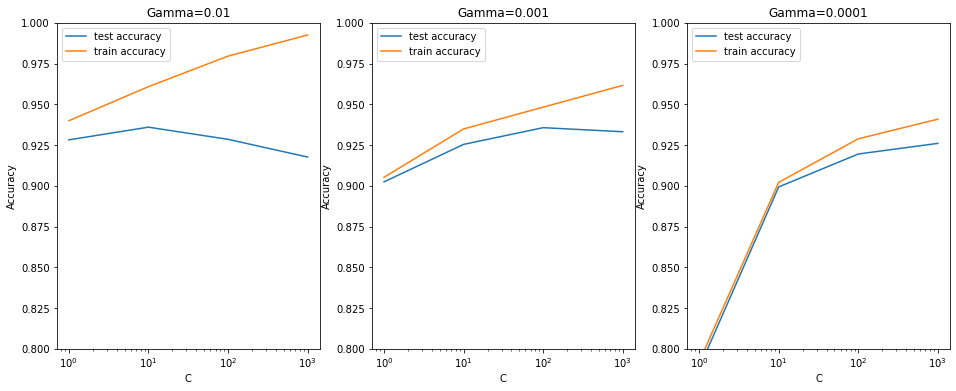

In [29]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


Inferences :
    - On higher values of gamma (gamma = 0.01) with c = 1000, the model tends to overfit. (training accuracy in fig(1) is higher than the test accuracy). Higher the gamma values, increses the amount of non-linearity in the model. When the linearity is increased, there is a significance difference in the traning and test data, which clearly indicates that this dataset doesn't do well with a non-linear model. Linear model would perform well in this dataset
    
    -  The training score increases with higher gamma, though the test scores are comparable(at sufficiently high cost, i.e. C > 10)
    - The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite simple non-linear model

In [30]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9360248447204969 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [33]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[775  36]
 [ 64 506]] 

accuracy 0.9275887038377987
precision 0.933579335793358
sensitivity/recall 0.887719298245614
